# Symulowane wyżarzanie
# Generacja obrazów binarnych

In [1]:

import numpy as np
from copy import copy
import matplotlib.pyplot as plt

def cost(img,energy_func):
    cost = 0
    n = img.shape[0]
    for row in range(n):
        for col in range(n):
            if img[row][col] == 1:
                cost+= energy_func(img,row,col)
    return cost

def swap(img):
    swapped = copy(img)
    n = img.shape[0]
    a,b = np.random.randint(0,n,(2,1))
    c,d = np.random.randint(0,n,(2,1))
    while swapped[a,b] == swapped[c,d] or (a,b) == (c,d):
        a,b = np.random.randint(0,n,(2,1))
        c,d = np.random.randint(0,n,(2,1))
    swapped[a,b], swapped[c,d] = swapped[c,d], swapped[a,b]
    return swapped

def cool(T,rate):
    return T *rate

def annealing(img,T,max_iter,rate,energy_func):
    T_init = T
    temp = [T]
    costs = [cost(img,energy_func)]
    for i in range(max_iter):
        new_img = swap(img)

        old_cost = cost(img,energy_func)
        new_cost = cost(new_img,energy_func)

        if new_cost <= old_cost:
            img = new_img
            costs.append(new_cost)
        else:
            if np.random.uniform(0,1) < np.exp((old_cost - new_cost)/T): 
                img = new_img
                costs.append(new_cost)
            else:
                costs.append(old_cost)

        T = cool(T,rate)
        temp.append(T)
        
        if i % (max_iter*0.3) == 0:
            T_init *= 0.9
            T = T_init

    return img,costs,temp


In [19]:
%matplotlib notebook
def energy8_pull(img,row,col):
    n = img.shape[0]
    return 9 - np.sum(img[max(0,row-1):min(row+1,n-1),max(0,col-1):min(col+1,n-1)])

def energy8_push(img,row,col):
    n = img.shape[0]
    return np.sum(img[max(0,row-1):min(row+1,n-1),max(0,col-1):min(col+1,n-1)])

def energy_lines(img,row,col):
    n = img.shape[0]
    ll = img[max(0,row-1),max(0,col-1)]
    ur = img[min(n-1,row+1),min(n-1,col+1)]
    ul = img[min(n-1,row+1),max(0,col-1)]
    lr = img[max(0,row-1),min(n-1,col+1)]

    return ll + ur + ul + lr

def energy_chessboard(img,row,col):
    n = img.shape[0]
    ll = img[max(0,row-1),max(0,col-1)]
    ur = img[min(n-1,row+1),min(n-1,col+1)]
    ul = img[min(n-1,row+1),max(0,col-1)]
    lr = img[max(0,row-1),min(n-1,col+1)]
    
    return 4 - ll - ur - ul - lr

def energy_stripes(img,row,col):
    n = img.shape[0]
    ll = img[max(0,row-1),max(0,col-1)]
    ur = img[min(n-1,row+1),min(n-1,col+1)]
    ul = img[min(n-1,row+1),max(0,col-1)]
    lr = img[max(0,row-1),min(n-1,col+1)]

    return 8 - ul - lr

def energy8_16(img,row,col):
    n = img.shape[0]
    inner = np.sum(img[max(0,row-1):min(row+1,n-1),max(0,col-1):min(col+1,n-1)])
    outer = np.sum(img[max(0,row-2):min(row+2,n-1),max(0,col-2):min(col+2,n-1)]) - inner
    return outer - inner


def test_binary_image(n,rho,T,max_iter,rate,energy_func):

    init_img = np.random.choice([0,1],size = (n,n),p =[1-rho,rho])


    after_img,costs,temp = annealing(init_img, T, max_iter, rate,energy_func)
    fig,ax = plt.subplots(2,2)

    ax[0,0].imshow(init_img)
    ax[0,0].set_title("Initial image")
    ax[0,1].imshow(after_img)
    ax[0,1].set_title("Image after annealing")
    ax[1,0].plot(temp)
    ax[1,0].set_title("Temperature")
    ax[1,1].plot(costs)
    ax[1,1].set_title("Cost")
    plt.tight_layout()
    plt.show()


Na początku popatrzmy na wyniki dla różnych wartości gęstości 0.1, 0.3 i 0.4 dla funkcji energi w której punkty z tym samym kolerem przyciągaja się. Stany sąsiednie w każdym przypadku będą generowane poprzez zamienienie dwóch losowych punktów o innym kolorze. Hiperparametry zostały wyznaczone eksperymentalnie, temperatura jest podgrzewania kilkuktornie za każdym razem o mniejszą wartośc.

<IPython.core.display.Javascript object>


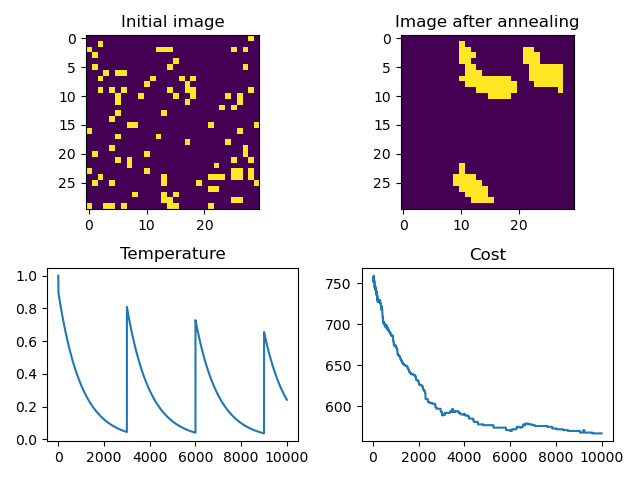

In [50]:
test_binary_image(30, 0.1, 1, 10000,0.999,energy8_pull)

<IPython.core.display.Javascript object>


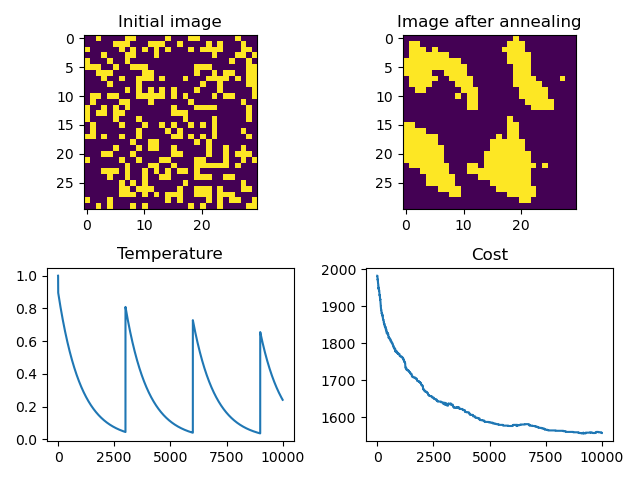

In [51]:
test_binary_image(30, 0.3, 1, 10000, 0.999,energy8_pull)

<IPython.core.display.Javascript object>


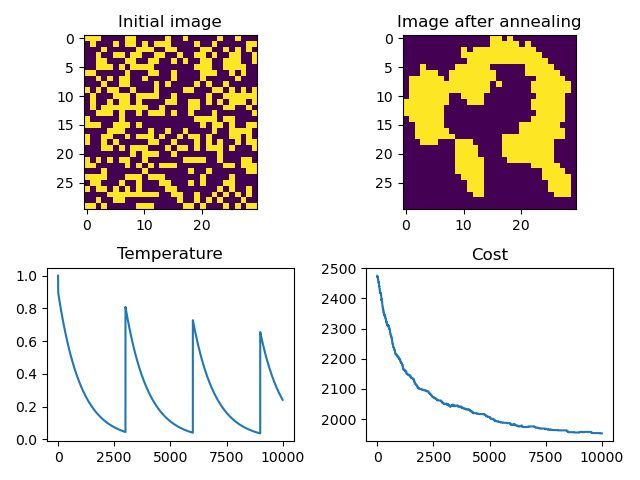

In [52]:
test_binary_image(30, 0.4, 1, 10000, 0.999,energy8_pull)

Następnie zobaczmy na kilka ciekawych funkcji energi oraz w jaki sposób wpływają one na wynikowy obrazek

<IPython.core.display.Javascript object>


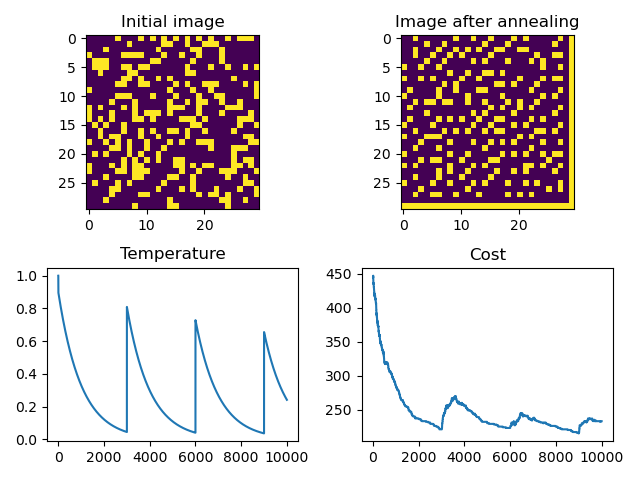

In [53]:
test_binary_image(30, 0.3, 1, 10000, 0.999,energy8_push)

<IPython.core.display.Javascript object>


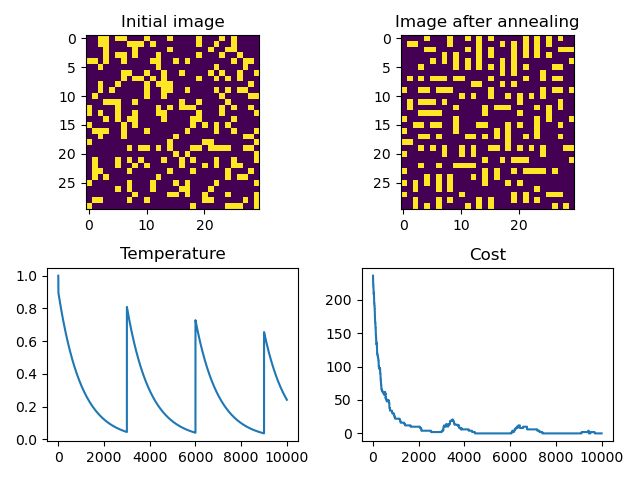

In [54]:
test_binary_image(30, 0.3, 1, 10000, 0.999,energy_lines)

<IPython.core.display.Javascript object>


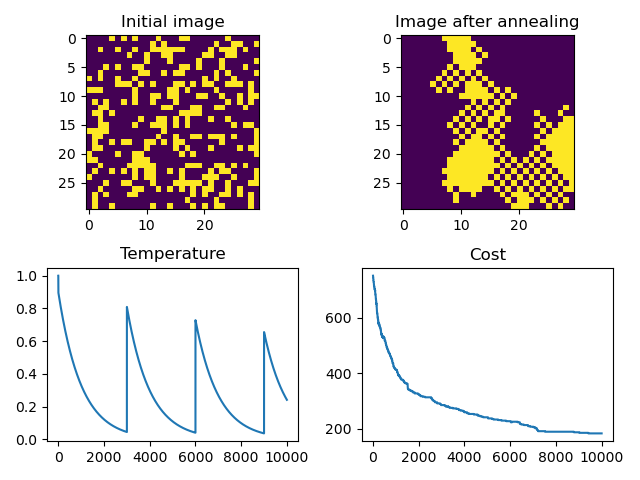

In [58]:
test_binary_image(30, 0.3, 1, 10000, 0.999,energy_chessboard)

<IPython.core.display.Javascript object>


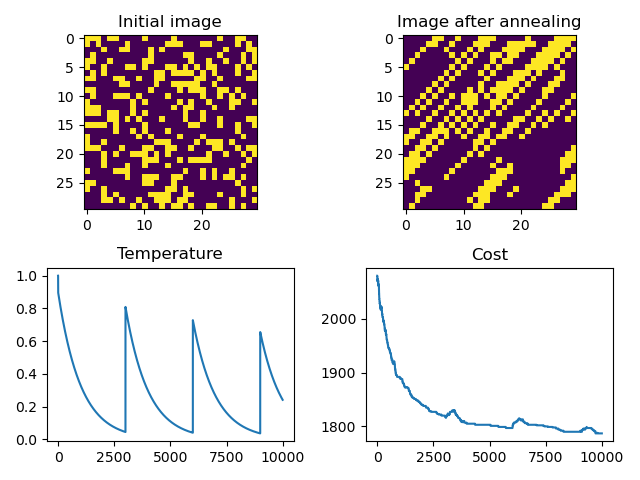

In [60]:
test_binary_image(30, 0.3, 1, 10000, 0.999,energy_stripes)

<IPython.core.display.Javascript object>


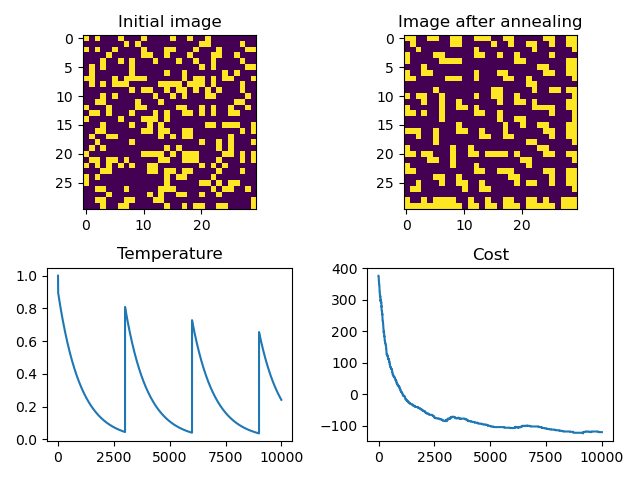

In [61]:
test_binary_image(30, 0.3, 1, 10000, 0.999,energy8_16)